In [193]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# 한글설정-그래프한글표시
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
# matplotlib.rcParams['font.family'] = 'Apple Gothic' # apple사용시
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [194]:
# 파일 불러오기
rating_data = pd.io.parsers.read_csv('movie/ratings.dat', names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::') 
movie_data = pd.io.parsers.read_csv('movie/movies.dat', names=['movie_id', 'title', 'genre'], delimiter='::') 
user_data = pd.io.parsers.read_csv('movie/users.dat', names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::')

In [195]:
# 평점정보 : user_id,movie_id,rating
rating_data.head(2)

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109


In [196]:
# 영화정보 : movie_id,title,genre
movie_data.head(2)

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [197]:
# 회원정보 : user_id,gender,age
user_data.head(2)

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072


In [198]:
# null 데이터가 있는지 확인
print(rating_data.isnull().sum())
print(movie_data.isnull().sum())
user_data.isnull().sum()

user_id     0
movie_id    0
rating      0
time        0
dtype: int64
movie_id    0
title       0
genre       0
dtype: int64


user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

년도별 영화개수 확인

In [199]:
# movie_data['title'][10]
movie_data['title'][0][-5:-1]

'1995'

In [200]:
# 총 영화 개수 - 3883개
len(movie_data['movie_id'].unique())

3883

In [201]:
# 총 회원수 - 6040명
len(user_data['user_id'].unique())

6040

In [202]:
# movie_data year컬럼 추가
# apply() : 함수적용
movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-1])

In [203]:
movie_data[:2]

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995


년도별 영화개수 출력

In [204]:
# 년도별 영화개수 - 높은순으로 정렬되어서 출력
movie_data['year'].value_counts().head()

1996    345
1995    342
1998    337
1997    315
1999    283
Name: year, dtype: int64

연대별 출력 ( 1910,1920,1930....)

In [205]:
movie_data['year_term'] = movie_data['title'].apply(lambda x : x[-5:-2]+'0')

In [206]:
movie_data.head(2)

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990


년대별 영화개수 출력

In [207]:
movie_year_term = movie_data['year_term'].value_counts().sort_index()

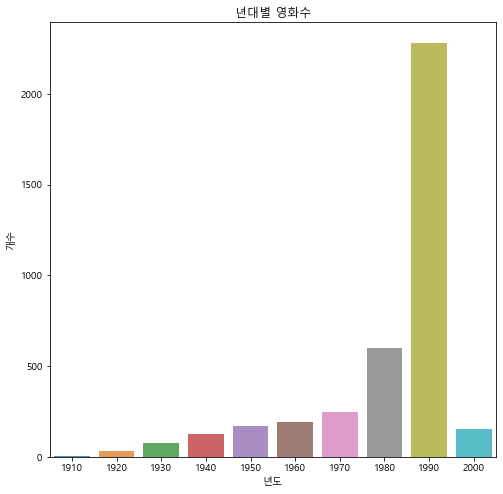

In [208]:
# pip install seaborn
sns.barplot(movie_year_term.index,movie_year_term.values,alpha=0.8)
plt.title('년대별 영화수')
plt.ylabel('개수')
plt.xlabel('년도')
plt.show()

장르별 검색 - movie_data : genre

In [209]:
movie_data.head(2)

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990


In [210]:
# Action이 포함되어 있는 영화 개수
# movie_data : genre-Action : 503개
len(movie_data[movie_data['genre'].str.contains('Action')])

503

In [211]:
# Action 만 있는 개수
data = movie_data['genre'].apply(lambda x : x=='Action')
len(movie_data[data])

65

In [212]:
movie_data['genre'].value_counts()[:10]

Drama             843
Comedy            521
Horror            178
Comedy|Drama      162
Comedy|Romance    142
Drama|Romance     134
Documentary       116
Thriller          101
Action             65
Drama|Thriller     63
Name: genre, dtype: int64

장르별 영화 개수

In [213]:
movie_data.columns

Index(['movie_id', 'title', 'genre', 'year', 'year_term'], dtype='object')

In [214]:
movie_data['genre'][:5]

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genre, dtype: object

In [215]:
test1 = movie_data['genre'][0].split('|')
test1 # list타입

['Animation', "Children's", 'Comedy']

In [216]:
# Drama:843, Comedy:521
unique_genre_dict={}
for index,row in movie_data.iterrows():
    genre_combination = row['genre'] # Animation|Children's|Comedy
    # list타입으로 받음.
    parsed_genre = genre_combination.split('|')
    
    # 장르별 분류
    for genre in parsed_genre: #['Animation', "Children's", 'Comedy']
        if genre in unique_genre_dict: #dic타입
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1    

print(unique_genre_dict)                

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


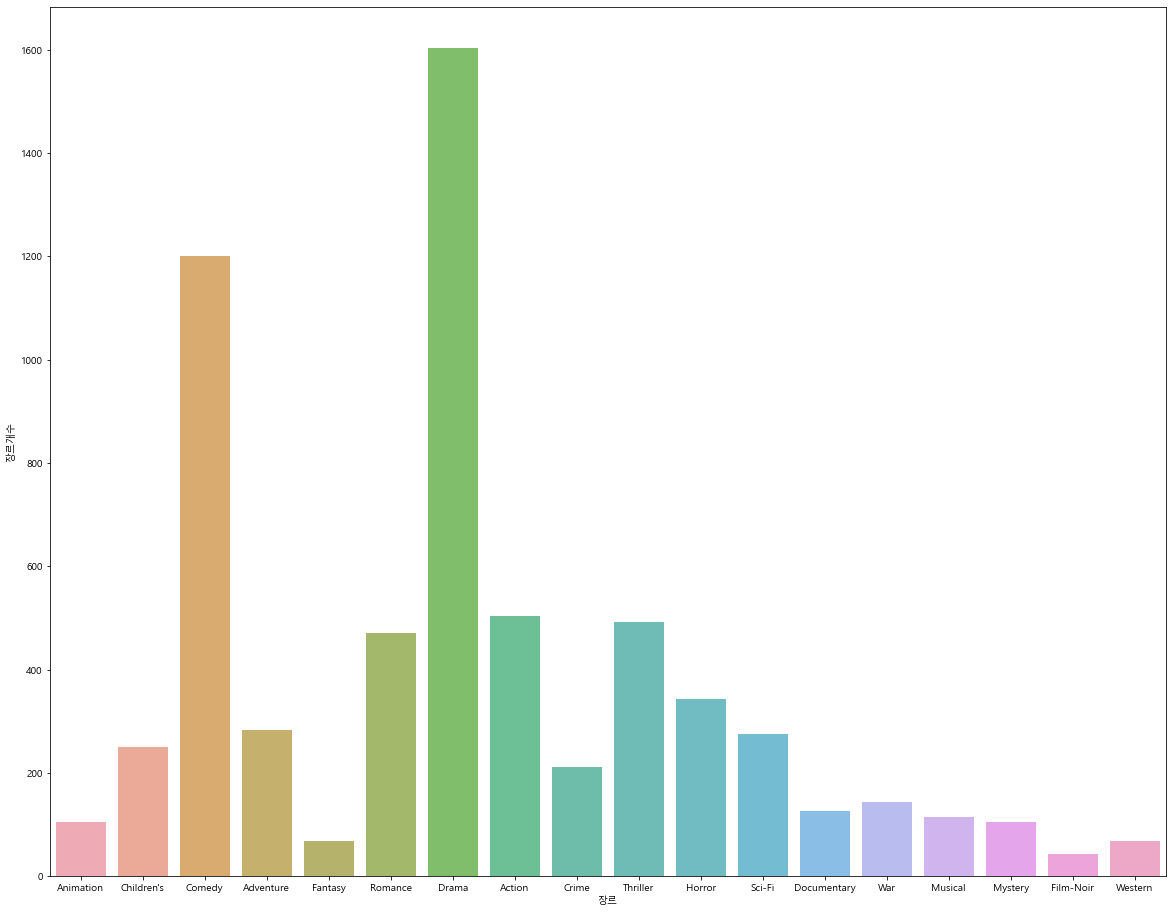

In [217]:
plt.rcParams['figure.figsize']=[20,16]
sns.barplot(list(unique_genre_dict.keys()),list(unique_genre_dict.values()),alpha=0.8)
plt.ylabel('장르개수')
plt.xlabel('장르')
plt.show()

전체회원 수 : 6040

전체영화 수 : 3883

[퀴즈]

* 회원의 성별 분류를 하시오.
* 회원의 연령대 분류를 하시오.

In [218]:
user_data.columns

Index(['user_id', 'gender', 'age', 'occupation', 'zipcode'], dtype='object')

In [219]:
# 회원의 성별 분류
user_gender = user_data['gender'].value_counts()
user_data['gender'].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

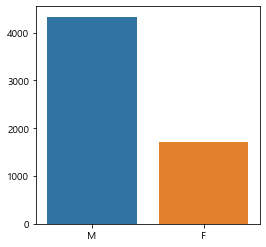

In [220]:
plt.rcParams['figure.figsize']=[4,4]
sns.barplot(user_gender.index,user_gender.values)
plt.show()

연령대별 분류

In [221]:
user_data['age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

10대,20대.... 분류

In [222]:
def age_class(age):
    if age==1:
        return 'etc'
    else:
        return str(age)[0]+'0' # 15-> 1+'0' -> 10

# 10대,20대,30대...
user_data['ages'] = user_data['age'].apply(lambda x : age_class(x))
user_ages = user_data['ages'].value_counts().sort_index() 
# 연령대별 인원수 
user_data['ages'].value_counts().sort_index() 

10     1103
20     2096
30     1193
40      550
50      876
etc     222
Name: ages, dtype: int64

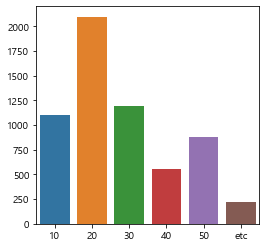

In [223]:
plt.rcParams['figure.figsize']=[4,4]
sns.barplot(user_ages.index,user_ages.values)
plt.show()

평점 데이터 정보

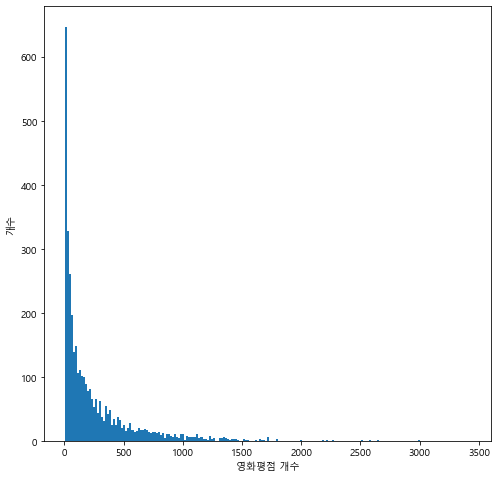

In [224]:
# 영화별 평점이 주어진 개수
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize']=[8,8]
fig = plt.hist(movie_rate_count, bins=200)
plt.ylabel('개수')
plt.xlabel('영화평점 개수')
plt.show()

In [225]:
print('총 영화 개수 : ',len(movie_data['movie_id'].unique()))
print('평점을 받은 개수가 100개이하인 수 : ',len(movie_rate_count[movie_rate_count<100]))


총 영화 개수 :  3883
평점을 받은 개수가 100개이하인 수 :  1687


In [226]:
# 영화별 평점을 받은 수, 평균 평점
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns=['rated_count','rating_mean']
movie_grouped_rating_info.head()

,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757


In [227]:
movie_data[:1]

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990


<AxesSubplot:>

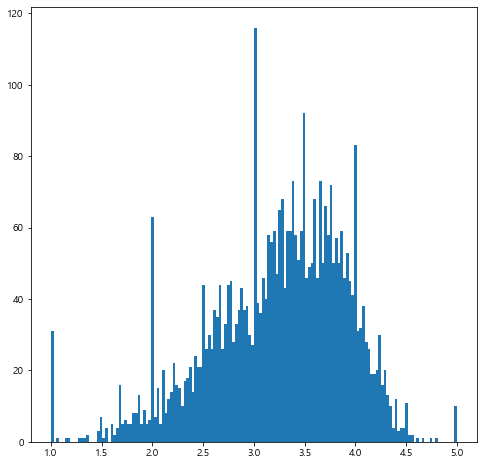

In [228]:
# 평균 평점 그래프
movie_grouped_rating_info['rating_mean'].hist(bins=150,grid=False)

평점 개수가 100개이상이면서, 평점이 높은 10개를 출력하시오.

In [229]:
# 평점 개수가 100개 이상이면서 평점이 높은 순으로 10개 출력
# 영화평점개수 : movie_grouped_rating_info['rating_count']
# 영화제목 : movie_data['title']
# 해당 컬럼이 다른곳에 있어서, 컬럼을 합치기를 해야 함.
# movie_grouped_rating_info 있는 것만 생성
merged_data = movie_grouped_rating_info.merge(movie_data,on=['movie_id'],how='left')
merged_data[merged_data['rated_count']>100][['movie_id','rated_count','rating_mean','title']].nlargest(10,'rating_mean')



,movie_id,rated_count,rating_mean,title
1839,2019,628,4.560510,Seven Samurai (The Magnificent Seven) (Shichin...
309,318,2227,4.554558,Shawshank Redemption The (1994)
802,858,2223,4.524966,Godfather The (1972)
708,745,657,4.520548,Close Shave A (1995)
49,50,1783,4.517106,Usual Suspects The (1995)
513,527,2304,4.510417,Schindler's List (1993)
1066,1148,882,4.507937,Wrong Trousers The (1993)
861,922,470,4.491489,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
1108,1198,2514,4.477725,Raiders of the Lost Ark (1981)
843,904,1050,4.476190,Rear Window (1954)


[퀴즈]

* 유저별로 평가한 영화 개수 : 
1번,2번,3번,.. 유저가 몇개 평점을 했는지 개수를 출력

In [230]:
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count','mean','std'])
user_grouped_rating_info.columns=['rated_count','rating_mean','rating_std']
user_grouped_rating_info.head()

,rated_count,rating_mean,rating_std
user_id,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699


<AxesSubplot:>

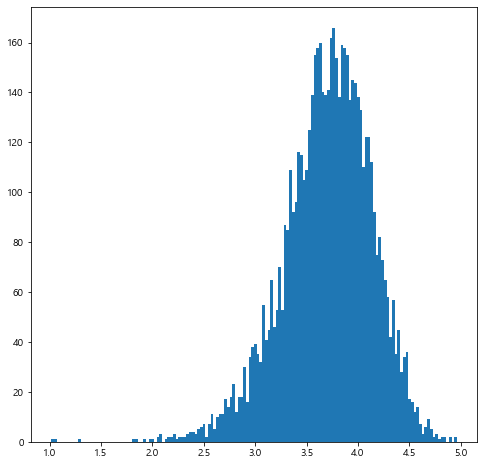

In [231]:
user_grouped_rating_info['rating_mean'].hist(bins=150,grid=False)

In [232]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [233]:
rating_table = rating_data[['user_id','movie_id','rating']].set_index(['user_id','movie_id']).unstack()
rating_table

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6036        NaN  NaN  NaN  2.0  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6037        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6038        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6039        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6040        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...       ...  ...  ...  ...  ...  ...  ...  ...  
6036      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6037      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6038      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6039      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6040      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[6040 rows x 3706 columns]

In [234]:
from surprise import SVD,Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# 과학적 표기법 억제 # 1.500e-10 .500e+00  -> 0. 1.5 
np.set_printoptions(suppress=True)

실습 예제 : 테스트

In [235]:
rating_dict = { 'item_id':[1,2,3,1,2,3,2],
                'user_id':['a','a','a','b','b','b','c'],
                'rating':[2,4,4,2,5,4,5]
}
df = pd.DataFrame(rating_dict)
df

,item_id,user_id,rating
0,1,a,2
1,2,a,4
2,3,a,4
3,1,b,2
4,2,b,5
5,3,b,4
6,2,c,5


In [236]:
df_matrix_table = df[['user_id','item_id','rating']].set_index(['user_id','item_id']).unstack().fillna(0)
df_matrix_table

rating          
item_id      1    2    3
user_id                 
a          2.0  4.0  4.0
b          2.0  5.0  4.0
c          0.0  5.0  0.0

SVD를 이용한 NaN 데이터 채우기

In [237]:
# SVD에 넣을수 있는 데이터셋을 생성
# 평점의 범위 지정 : 1-5점까지 범위지정
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df=df[['user_id','item_id','rating']],reader=reader)
# 행렬완성 데이터셋으로 변경
train_data = data.build_full_trainset()

In [238]:
# SVD모델 훈련
model = SVD(
    n_factors=8,
    lr_all=0.005, # 모든 파라미터 학습비율
    reg_all=0.02, # 모든 파라미터 정규화 정도
    n_epochs=10
)
model.fit(train_data)

SVD를 활용해서 값 

In [239]:
# build_anti_testset : 행렬에서 채워지지 않은 위치를 가져옴
test_data = train_data.build_anti_testset()
# 채워지지 않은 위치에 값을 예측
predictions = model.test(test_data)

# 예측한 값 출력
for _, iid, _, predicted_rating, _ in predictions:
    print(('item_id :',iid,"|",'예측값 :',predicted_rating))

('item_id :', 1, '|', '예측값 :', 3.6033004627309375)
('item_id :', 3, '|', '예측값 :', 3.8227924644235145)


전체 데이터 예측값 출력

In [240]:
test_data = train_data.build_testset()
predictions = model.test(test_data)

for _, iid, real_rating,predicted_rating, _ in predictions:
   print('item_id :',iid,'|','실제평점 :',real_rating,'|','예측평점 :',predicted_rating) 

item_id : 1 | 실제평점 : 2.0 | 예측평점 : 3.473592252229498
item_id : 2 | 실제평점 : 4.0 | 예측평점 : 3.7701055892128967
item_id : 3 | 실제평점 : 4.0 | 예측평점 : 3.6740400208071464
item_id : 1 | 실제평점 : 2.0 | 예측평점 : 3.4881839615443826
item_id : 2 | 실제평점 : 5.0 | 예측평점 : 3.823200860851907
item_id : 3 | 실제평점 : 4.0 | 예측평점 : 3.7585011181515506
item_id : 2 | 실제평점 : 5.0 | 예측평점 : 3.924824156191998


실제 데이터 적용

* rating_data[['user_id','movie_id','rating']] 사용

In [241]:
# SVD 데이터셋 생성
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']],reader)
train_data = data.build_full_trainset()

In [242]:
# SVD모델 훈련
train_start = time.time()
model = SVD(
    n_factors=8,
    lr_all=0.005, # 모든 파라미터 학습비율
    reg_all=0.02, # 모든 파라미터 정규화 정도
    n_epochs=10
)
model.fit(train_data)
train_end = time.time()
print('모델 훈련시간 : %.2f 초'%(train_end - train_start))

모델 훈련시간 : 6.81 초


user_id 4번 회원의 영화평점이 없는 영화의 예측 평점을 구하시오.

In [243]:
# 4번 회원의 영화평점한 영화 개수
target_user_id = 4
target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [244]:
# 영화마다 평점을 출력
# user_id 4번이 평점을 매긴 영화만 저장
target_user_movie_rating_dict={}
for index,row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id]=row['rating']
    
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


user_id 4번인 회원이 평점을 하지 않은 영화

In [245]:
test_data = []
# 모든영화데이터에서 평점을 매기지 않은 영화를 찾기
for index,row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    # 영화평점이 있는 데이터
    if movie_id in target_user_movie_rating_dict:
        continue # 스킵
    # target_user_id:4, 영화, 0:평점이 매겨지지 않은 값
    test_data.append((target_user_id,movie_id,rating))

In [246]:
test_data[:5]

[(4, 1, 0), (4, 2, 0), (4, 3, 0), (4, 4, 0), (4, 5, 0)]

평점이 없는 영화 평점 예측

In [247]:
target_user_predictions = model.test(test_data)

# predictions:예측점수포함,user_history:평점이 된 영화
def get_user_predicted_ratings(predictions,user_id,user_history):
    # 예측 평점
    target_user_movie_predict_dict ={}
    # uid:user_id,mid:movie_id,rating:실제평점, 예측평점
    for uid,mid,rating,predicted_rating,_ in predictions:
        # 4번 회원것만 찾음
        if user_id == uid:
            # 평점이 없는 것만 찾음
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict 

# 함수호출 : 평점이 없는 영화데이터의 예측평점을 가져옴.
target_user_movie_predict_dict = get_user_predicted_ratings(
    # 평점이 없는 영화데이터 저장
    predictions=target_user_predictions,
    # 4번
    user_id = target_user_id,
    # 평점이 매개져 있는 영화데이터만 저장
    user_history = target_user_movie_rating_dict
)           


In [248]:
import operator

target_user_top10_predicted = sorted(
    target_user_movie_predict_dict.items(),
    # key movie_id,rating,  평점기준
    key=operator.itemgetter(1),
    # 역순정렬 10개
    reverse=True)[:10]

In [249]:
target_user_top10_predicted

[(2905, 4.826746453690058),
 (318, 4.8025653198262255),
 (527, 4.795324238281459),
 (745, 4.739406365119223),
 (2019, 4.73810551534571),
 (858, 4.728409826867926),
 (1148, 4.688269458011602),
 (922, 4.686684493854688),
 (904, 4.682413109681473),
 (50, 4.670169399635382)]

영화제목과 예측평점을 출력

In [250]:
# movie_id,title 2개를 dic타입으로 저장
movie_dict={}
for index,row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title

예측 평점 상위10개 출력

In [251]:
# 영화제목,예측평점 출력
# target_user_top10_predicted : movie_id,rating
print('영화번호','영화제목','예측평점')
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_id,movie_dict[movie_id],':',predicted_rating)

영화번호 영화제목 예측평점
2905 Sanjuro (1962) : 4.826746453690058
318 Shawshank Redemption  The (1994) : 4.8025653198262255
527 Schindler's List (1993) : 4.795324238281459
745 Close Shave  A (1995) : 4.739406365119223
2019 Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954) : 4.73810551534571
858 Godfather  The (1972) : 4.728409826867926
1148 Wrong Trousers  The (1993) : 4.688269458011602
922 Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : 4.686684493854688
904 Rear Window (1954) : 4.682413109681473
50 Usual Suspects  The (1995) : 4.670169399635382


In [252]:
# user_id 4번이 평점한 영화 리스트
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [253]:
# 실제 평점이 높은 10개 영화데이터 출력
target_user_top10_real = sorted(target_user_movie_rating_dict.items(),
                                key=operator.itemgetter(1),reverse=True)[:10]
target_user_top10_real

[(3468, 5),
 (260, 5),
 (2028, 5),
 (1198, 5),
 (1954, 5),
 (1387, 5),
 (1201, 5),
 (2692, 5),
 (2947, 5),
 (1240, 5)]

실제평점 상위10개 출력

In [254]:
# 영화번호,영화제목,실제평점 출력
# target_user_top10_real : movie_id,rating
print('영화번호','영화제목','예측평점')
for real in target_user_top10_real:
    movie_id = real[0]
    real_rating = real[1]
    print(movie_id,movie_dict[movie_id],':',real_rating)

영화번호 영화제목 예측평점
3468 Hustler  The (1961) : 5
260 Star Wars: Episode IV - A New Hope (1977) : 5
2028 Saving Private Ryan (1998) : 5
1198 Raiders of the Lost Ark (1981) : 5
1954 Rocky (1976) : 5
1387 Jaws (1975) : 5
1201 Good  The Bad and The Ugly  The (1966) : 5
2692 Run Lola Run (Lola rennt) (1998) : 5
2947 Goldfinger (1964) : 5
1240 Terminator  The (1984) : 5


예측 모델 정확도 측정

In [255]:
# SVD 데이터셋 생성
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']],reader)
# train_data = data.build_full_trainset()
train_data,test_data = train_test_split(data,test_size=0.2)

# SVD모델 훈련
train_start = time.time()
model = SVD(
    n_factors=8,
    lr_all=0.005, # 모든 파라미터 학습비율
    reg_all=0.02, # 모든 파라미터 정규화 정도
    n_epochs=10
)
model.fit(train_data)
train_end = time.time()
print('모델 훈련시간 : %.2f 초'%(train_end - train_start))

# 모델 정확도 측정
predictions = model.test(test_data)

# RMSE : 제곱근 오차
print('[ SVD모델 데이터셋 RMSE ]')
accuracy.rmse(predictions)


모델 훈련시간 : 6.63 초
[ SVD모델 데이터셋 RMSE ]
RMSE: 0.9041


0.9041432871704138

실제평점과 예측평점의 비교

In [256]:
# 4번회원의 실제 평점이 주어진 영화데이터 찾기
test_data=[]
# 모든 영화데이터 가져오기
for index,row in movie_data.iterrows():
   # 실제평점이 있는것만 가져옴.
   movie_id = row['movie_id']
   # 4번이 쓴 평점 데이터 모음과 비교 : target_user_movie_rating_dict
   if movie_id in target_user_movie_rating_dict:
       rating = target_user_movie_rating_dict[movie_id]
       test_data.append((target_user_id,movie_id,rating)) 

In [259]:
test_data

[(4, 260, 5),
 (4, 480, 4),
 (4, 1036, 4),
 (4, 1097, 4),
 (4, 1196, 2),
 (4, 1198, 5),
 (4, 1201, 5),
 (4, 1210, 3),
 (4, 1214, 4),
 (4, 1240, 5),
 (4, 1387, 5),
 (4, 1954, 5),
 (4, 2028, 5),
 (4, 2366, 4),
 (4, 2692, 5),
 (4, 2947, 5),
 (4, 2951, 4),
 (4, 3418, 4),
 (4, 3468, 5),
 (4, 3527, 1),
 (4, 3702, 4)]

In [260]:
# 4번이 평점을 매긴 영화데이터를 가지고 예측평점 훈련
# 실제평점,예측평점 비교할 목적
target_user_predictions = model.test(test_data)

# predictions:예측점수포함,user_history:평점이 된 영화
def get_user_predicted_ratings(predictions,user_id,user_history):
    # 예측 평점
    target_user_movie_predict_dict ={}
    # uid:user_id,mid:movie_id,rating:실제평점, 예측평점
    for uid,mid,rating,predicted_rating,_ in predictions:
        # 4번 회원것만 찾음
        if user_id == uid:
            # 평점이 없는 것만 찾음
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict 

# 함수호출 : 평점이 없는 영화데이터의 예측평점을 가져옴.
target_user_movie_predict_dict = get_user_predicted_ratings(
    # 평점이 없는 영화데이터 저장
    predictions=target_user_predictions,
    # 4번
    user_id = target_user_id,
    # 평점이 매개져 있는 영화데이터만 저장
    user_history = target_user_movie_rating_dict
)  


In [261]:
target_user_movie_predict_dict

{260: 4.5293301788532,
 480: 3.866059455026233,
 1036: 4.26630231532578,
 1097: 4.014417881471171,
 1196: 4.298728880326081,
 1198: 4.584424290519379,
 1201: 4.251865502736438,
 1210: 4.076384923263854,
 1214: 4.212098091782283,
 1240: 4.198387417319812,
 1387: 4.188536951761211,
 1954: 4.1276912473637335,
 2028: 4.437457973109761,
 2366: 3.8571961829711285,
 2692: 4.3736607913555305,
 2947: 4.090965548166054,
 2951: 4.14988543575815,
 3418: 3.8488235831824484,
 3468: 4.491588726590434,
 3527: 3.7401868000636993,
 3702: 3.742023228894937}

예측평점, 실제평점 영화타이틀을 출력

In [263]:
origin_rating_list=[]
predicted_rating_list=[]
movie_title_list=[]
idx=0

# 실제평점의 예측평점 데이터
for movie_id,predicted_rating in target_user_movie_predict_dict.items():
    idx = idx + 1
    # 예측평점 소수점 2자리
    predicted_rating = round(predicted_rating,2)
    # 실제평점 데이터를 찾아 저장
    origin_rating = target_user_movie_rating_dict[movie_id]
    # 영화번호를 가지고 영화제목 찾아 저장
    movie_title = movie_dict[movie_id]
    print('movie',str(idx),':',movie_title,'-',origin_rating,'/',predicted_rating)
    
    # list저장
    origin_rating_list.append(origin_rating)
    predicted_rating_list.append(predicted_rating)
    movie_title_list.append(str(idx))

movie 1 : Star Wars: Episode IV - A New Hope (1977) - 5 / 4.53
movie 2 : Jurassic Park (1993) - 4 / 3.87
movie 3 : Die Hard (1988) - 4 / 4.27
movie 4 : E.T. the Extra-Terrestrial (1982) - 4 / 4.01
movie 5 : Star Wars: Episode V - The Empire Strikes Back (1980) - 2 / 4.3
movie 6 : Raiders of the Lost Ark (1981) - 5 / 4.58
movie 7 : Good  The Bad and The Ugly  The (1966) - 5 / 4.25
movie 8 : Star Wars: Episode VI - Return of the Jedi (1983) - 3 / 4.08
movie 9 : Alien (1979) - 4 / 4.21
movie 10 : Terminator  The (1984) - 5 / 4.2
movie 11 : Jaws (1975) - 5 / 4.19
movie 12 : Rocky (1976) - 5 / 4.13
movie 13 : Saving Private Ryan (1998) - 5 / 4.44
movie 14 : King Kong (1933) - 4 / 3.86
movie 15 : Run Lola Run (Lola rennt) (1998) - 5 / 4.37
movie 16 : Goldfinger (1964) - 5 / 4.09
movie 17 : Fistful of Dollars  A (1964) - 4 / 4.15
movie 18 : Thelma & Louise (1991) - 4 / 3.85
movie 19 : Hustler  The (1961) - 5 / 4.49
movie 20 : Predator (1987) - 1 / 3.74
movie 21 : Mad Max (1979) - 4 / 3.74


그래프 시각화

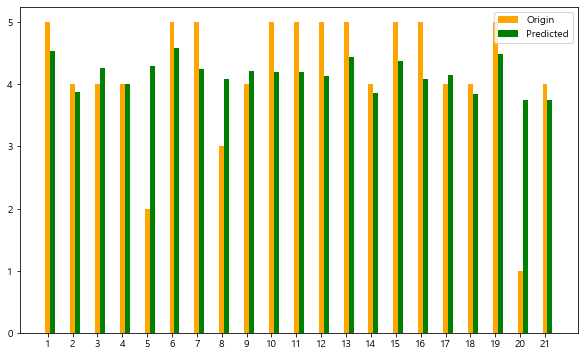

In [264]:
origin = origin_rating_list
predicted = predicted_rating_list

plt.rcParams['figure.figsize']=(10,6)
# 실제평점 21개
index = np.arange(len(movie_title_list))
bar_width=0.2

# 실제평점과 예측평점 bar그래프 출력
rects1 = plt.bar(index,origin,bar_width,color='orange',label='Origin')
rects2 = plt.bar(index+bar_width,predicted,bar_width,color='green',label='Predicted')
plt.xticks(index,movie_title_list)
plt.legend()
plt.show()

영화를 추천합니다.

예측평점이 높은 순으로 user_id=4 인것에 영화리스트를
출력하면 추천

상위10개를 출력하면 추천프로그램이 됩니다.


genre장르별로 3개씩해서 추천을 하는 것을 만들어 보시면 좋겠습니다.